In [2]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


In [3]:
print(type(df))
print(type(df['name']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


One pandas dataframe contains many series ("columns")

<AxesSubplot:xlabel='num_children', ylabel='num_pets'>

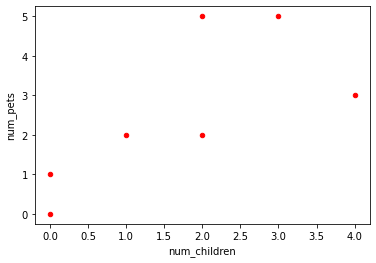

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')

```plt.show()```???
Is not needed when running in interactive mode.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df.plot(kind='bar',x='name',y='age')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
plt.savefig('output.png')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('state')['name'].nunique().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')

In [ ]:
import numpy as np
import pandas as pd

index = pd.MultiIndex.from_tuples([('one', 'x'), ('one', 'y'),
                                   ('two', 'x'), ('two', 'y')])
s = pd.Series(np.arange(2.0, 6.0), index=index)
s

In [ ]:
s.unstack(level=-1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# create dummy variable then group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['state'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# source dataframe using an arbitrary date format (m/d/y)
df = pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

In [ ]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], infer_datetime_format=True)

plt.clf()
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')